In [1]:
import pandas as pd
import numpy as np 
import re 
import umap
import umap.plot
import matplotlib.pyplot as plt 
from tqdm.auto import tqdm


2023-06-23 13:59:53.691843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 13:59:53.782725: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-23 13:59:54.222619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-23 13:59:54.222659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
df = pd.read_csv("csv/ctgov_studies_20230621_openai_embedding.csv", index_col="nct_id")
df


,brief_title,official_title,overall_status,baseline_measurements,brief_summaries,detailed_descriptions,criteria,gender,minimum_age,maximum_age,facilities,city,state,zip,country,recruitment_details,pre_assignment_details,study_type,embeddings
nct_id,,,,,,,,,,,,,,,,,,,
NCT00000143,Studies of Ocular Complications of AIDS (SOCA)...,Studies of Ocular Complications of AIDS (SOCA)...,Completed,NaN,"To compare the newest CMV retinitis drug, cido...",Cytomegalovirus (CMV) is among the most freque...,Inclusion criteria:\n\nAge 13 years or older\n...,All,13 Years,NaN,"University of South Florida, MDC Box 21",Tampa,Texas,94143,United States,June 1997,NaN,Interventional,"[-0.009765988955702291, 0.0010155662695186536,..."
NCT00000378,Antidepressant Treatment of Melancholia in Lat...,Antidepressant Treatment of Melancholia in Lat...,Completed,NaN,The purpose of this study is to compare the sa...,To compare the efficacy and safety of a select...,Inclusion Criteria:\n\n-\n\nPatients must have...,All,60 Years,95 Years,1051 Riverside Drive,New York,New York,10032,United States,NaN,NaN,Interventional,"[-0.01376020029446681, -0.0032447056218115897,..."
NCT00000620,Action to Control Cardiovascular Risk in Diabe...,Action to Control Cardiovascular Risk in Diabe...,Completed,NaN,The purpose of this study is to prevent major ...,"BACKGROUND:\n\nCurrently, about 17 million Ame...",Inclusion Criteria:\n\nDiagnosed with type 2 d...,All,40 Years,79 Years,Wake Forest University,Winston-Salem,Washington,98195,United States,All participants had established type 2 diabet...,Eligible participants provided evidence of abi...,Interventional,"[-0.026839681768819446, -0.021970773769895282,..."
NCT00001151,"Studies With 1,25-Dihydroxycholecalciferol","Studies With 1,25-Dihydroxycholecalciferol",Terminated,NaN,Vitamin D in the diet undergoes changes in the...,"Patients with extreme resistance to 1,25-dihyd...",INCLUSION CRITERIA:\n\nPatients with hereditar...,All,NaN,NaN,"National Institutes of Health Clinical Center,...",Bethesda,Maryland,20892,United States,NaN,NaN,Interventional,"[-0.0031137232839347855, -0.007138206517213198..."
NCT00001213,Cysteamine Eye Drops to Treat Corneal Crystals...,Trial of Topical Cysteamine in the Treatment o...,Completed,Although 328 participants were initially enrol...,Cystinosis is an inherited disease that result...,"Protocol 86-EI-0062 began as a randomized, dou...",INCLUSION CRITERIA:\n\nPatients must have a do...,All,2 Years,NaN,"National Institutes of Health Clinical Center,...",Bethesda,Maryland,20892,United States,NaN,NaN,Interventional,"[0.0031660161636455526, -0.016164252393602824,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT05490771,Testing Copanlisib as a Potential Targeted Tre...,Phase II Study of Copanlisib in Patients With ...,"Active, not recruiting",NaN,This phase II MATCH treatment trial identifies...,PRIMARY OBJECTIVE:\n\nI. To evaluate the propo...,Inclusion Criteria:\n\nPatients must have met ...,All,18 Years,NaN,ECOG-ACRIN Cancer Research Group,Philadelphia,Pennsylvania,19103,United States,"Subprotocol Z1F was activated on June 20, 2018...",The PIK3CA mutations status was determined by ...,Interventional,"[-0.04224925405394027, -0.007825714382569795, ..."
NCT05502081,Clinical Study to Compare Efficacy and Safety ...,Clinical Study to Evaluate the Possible Effica...,Completed,0. Uninfected\n\nAmbulatory mild disease\n\nAs...,Introduction:\n\nCorona Virus induced disease ...,I. INTRODUCTION\n\n1.1. COVID-19 overview and ...,Inclusion Criteria:\n\nage more than 12 years ...,All,12 Years,NaN,El-gomhoria St,Mansoura,El-dkhalia,050,Egypt,from 1/11/2021 to 29/5/2022 at isolation hospi...,assignment is applied after admission of parti...,Interventional,"[-0.027767390415470324, 0.012096415449287686, ..."
NCT05594173,Chewing and Oral Processing of Solid Food,Chewing and Oral Processing of Solid Food in H...,Completed,NaN,Food texture modification is commonly used as ...,Aim: To e

In [3]:
embeddings = df["embeddings"].copy()
embeddings = embeddings.apply(lambda x: np.fromstring(
    re.sub(r'[\n\[\]]', '', x), sep=',').astype(np.float32)
)
embeddings[0]


array([-0.00976599,  0.00101557,  0.02044237, ..., -0.02474602,
       -0.01968371, -0.02139414], dtype=float32)

In [4]:
array = np.stack(embeddings)
array.shape


(34983, 1536)

In [5]:
mapper = reduced_embeddings = umap.UMAP(
    n_neighbors=15, 
    min_dist=0.05
)

reduced_embeddings = mapper.fit(array)


<Axes: >

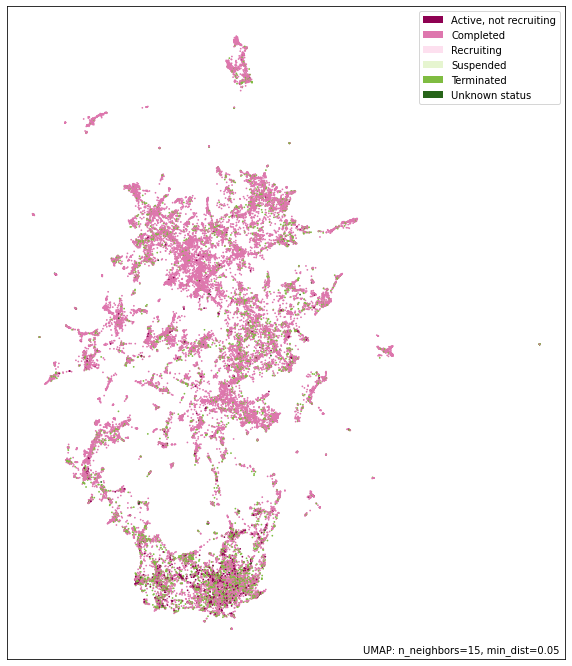

In [6]:
umap.plot.points(
    mapper,
    labels=df["overall_status"],
    color_key_cmap="PiYG", #'PiYG',
    width=1000, 
    height=1200, 
)

In [7]:
# umap.plot.connectivity(
#     mapper, edge_bundling='hammer', 
#     labels=df["overall_status"],
#     color_key_cmap='PiYG',
#     width=1200, 
#     height=1200,
# )


In [8]:
# hover_data = pd.DataFrame({'index': np.arange(len(df)),
#                            'label': df["overall_status"]})
# hover_data['item'] = hover_data.label.map(
#     {
#         '0': 'Active, not recruiting',
#         '1': 'Completed',
#         '2': 'Recruiting',
#         '3': 'Suspended',
#         '4': 'Terminated',
#         '5': 'Unknown status'
#     }
# )

# umap.plot.output_notebook()


In [9]:
# p = umap.plot.interactive(
#     mapper, 
#     labels=df["overall_status"], 
#     hover_data=hover_data, 
#     point_size=2
# )
# umap.plot.show(p)
